In [1]:
# These are helpful routines that will assist in building this book.
# You should run this block before anything else. There is no output expected.
from astrodynamicsbook.bookhelpers import *

loadLatexPreamble()

# This is only here to create the navigation link:
genPrevLink()

$
\def\bs{\boldsymbol}
\def\mf{\mathbf}
\def\mb{\mathbb}
\def\mc{\mathcal}
\def\rfr{\mathcal}
\def\grad{{\rm grad}}
\def\Re{{\rm Re}}
\def\Im{{\rm Im}}
\def\und{\underline}
\def\ovl{\overline}
\def\unb{\underbrace}
\def\Log{\mbox{Log}}
\def\bfomega{\bs \omega}
\def\bfalpha{\bs \alpha}
\def\da{\triangleq}
\newcommand{\leftexp}[2]{{\vphantom{#2}}^{#1}\!{#2}}
\newcommand{\leftsub}[2]{{\vphantom{#2}}_{#1}\!{#2}}
\newcommand{\omegarot}[2]{{\leftexp{\mathcal{#1}}{\boldsymbol{\omega}}^{\mathcal{#2}}}}
\newcommand{\alpharot}[2]{{\leftexp{\mathcal{#1}}{\boldsymbol{\alpha}}^{\mathcal{#2}}}}
\newcommand{\framerot}[2]{{\leftexp{\mathcal{#1}}{C}^{\mathcal{#2}}}}
\newcommand{\dframerot}[2]{{\vphantom{\dot{C}}^{\mathcal{#1}}\!{\dot{C}^{\mathcal{#2}}}}}
\newcommand{\bdot}[1]{\dot{\mathbf{#1}}}
\newcommand{\bhat}[1]{\hat{\mathbf{#1}}}
\newcommand{\mbhat}[1]{\hat{\mathbb{#1}}}
\def\iwb{\omegarot{I}{B}}
\def\iab{\alpharot{I}{B}}
\def\icb{\framerot{I}{B}}
\def\dif{\mathop{}\!\mathrm{d}}
\newcommand{\intd}[1]{\dif#1}
\newcommand{\od}[3][]{{ \frac{\dif{^{#1}}#2}{\dif{#3^{#1}}} }}			
\newcommand{\pd}[3][]{{ \frac{\partial{^{#1}}#2}{\partial{#3^{#1}}} }}	 
\newcommand{\md}[6]{{  \frac{\partial{^{#2}}#1}{\partial{#3^{#4}}\partial{#5^{#6}}} }}
\newcommand{\fddt}[2][]{{  \leftexp{\mathcal{#2}}{\frac{\dif{#1}}{\dif{t}}}  }}
\newcommand{\fdddt}[2][]{{  \leftexp{\mathcal{#2}}{\frac{\dif{^{2}#1}}{\dif{t^2}}}  }}
\newcommand{\ddt}[1][]{\fddt[#1]{I}}
$


# [Previous](<19-f and g Functions.ipynb>)

# Solving for $f$ and $g$ without full orbital knowledge

As pointed out towards the end of the [previous section](<19-f and g Functions.ipynb#The-Kepler-State-Transition-Matrix>), use of the $f$ and $g$ expressions is predicated on having full orbital knowledge, and requires us to solve the same basic inversion of Kepler's time equation as our previous approaches to orbital propagation. As such, there does not appear to be a lot of value added here (beyond the notational niceties of the approach).  However, there are some instances (such as in initial orbit determination problems) where coarse estimates of $f$ and $g$ will do.  In these cases, we can consider an alternate approach to their evaluation: namely, via series expansion.  First, however, let's take a brief aside (as we are wont to do) and discuss:

# Lagrange's Fundamental Invariants

Let's consider the quantity:
$$\sigma \triangleq \frac{\mu}{r^3}$$

Differentiating in time:

In [2]:
mu, r, rd, t, s = symbols("mu, r, rdot,t,sigma", real=True)
diffmap = {r: rd}
sigmaexp = mu / r**3
dsigmaexp = difftotal(sigmaexp, t, diffmap)
dsigmaexp.subs(sigmaexp, s)

so that
$$\dot\sigma = -\frac{3 \sigma}{r}\dot r$$

Now let's consider:

$$p \triangleq \frac{\mf r \cdot \mf v}{r^2}$$

In [3]:
nu, nud = symbols("nu, nudot", real=True)
diffmap = {r: rd, nu: nud}
rvec = Matrix(
    [r * cos(nu), r * sin(nu), 0]
)  # orbital radius in perifocal frame components
vvec = difftotalmat(rvec, t, diffmap)
pexp = simplify(rvec.dot(vvec) / r**2)
pexp

Evaluating the dot product in perifocal frame components, we see that $\mf r \cdot \mf v = r\dot r $ and thus:
$$p = \frac{\dot r}{r}$$
Differentiating $p$, we have:
$$\dot p = \frac{\ddot r}{r} - \underbrace{\frac{\dot r^2}{r^2}}_{\displaystyle \equiv p^2}$$

Since $\mf r \cdot \mf v = r\dot r $, we have:
$$ \dot r \frac{\mf r \cdot \mf v }{r} \quad \Longrightarrow \quad \ddot r = \fddt{I}\left(\frac{\mf r \cdot \mf v }{r}\right) = \underbrace{\frac{\mf v \cdot \mf v}{r}}_{\displaystyle \equiv \frac{v^2}{r}} - \underbrace{\frac{\mf r \cdot \mf v}{r^2}}_{\displaystyle \equiv \frac{\dot r}{r}}\dot r + \frac{\mf r}{r}\cdot \underbrace{\fddt{I}\mf v}_{\displaystyle \equiv -\frac{\mu}{r^3}\mf r} $$
  
Noting that we have defined a factor in the final term as $\sigma$, we can write:
$$\dot p = \frac{v^2}{r^2} - \sigma - 2p^2$$

Finally, let's define the first two terms of the $\dot p$ expression as $q$:
$$q \triangleq \frac{\mf v \cdot \mf v}{r^2} - \sigma$$

Differentiating (you knew this was coming):
$$\dot q = \underbrace{2\frac{\mf v \cdot \fddt{\mc I}\mf v}{r^2}}_{\displaystyle \equiv \frac{-2\mu}{r^5}\mf v \cdot \mf r} - 2\frac{2\dot r v^2}{r^3} - \dot \sigma = \frac{\dot r}{r}\left(-2\frac{\mu}{r^3} - 2\frac{v^2}{r^2} + 3\sigma\right) = p(-2q - \sigma)$$

Ok, neat enough, and all, but what was the point of any of that?  Collectively, $\sigma, p$, and $q$ are known as:

<div class="alert alert-block alert-info">
    <b>Lagrange's Fundamental Invariants</b>
  $$ \begin{array}{lll}
  \sigma \triangleq \dfrac{\mu}{r^3}  \qquad &\displaystyle p \triangleq \dfrac{\mf r \cdot \mf v}{r^2} = \frac{\dot r}{r} \qquad &q \triangleq \dfrac{\mf v \cdot \mf v}{\mf r \cdot \mf r} - \sigma\\
\dot\sigma = -3\sigma p \qquad &\dot p = q - 2p^2 \qquad &\dot q = -p(2q + \sigma)
  \end{array}$$
</div>

These values are closed under differentiation - their derivatives are all expressible in terms of the original values as strictly polynomial functions.  This means that we can recursively generate infinite orders of derivatives of these expressions by just evaluating polynomials.  Suddenly, things begin to look more interesting. The trick now is to figure out how to use this in the evaluation of $f$ and $g$. 

# Power Series Solutions for $f$ and $g$

Consider the expansion of $\mf r(t = t_0 + \Delta t)$ about $\mf r_0(t_0)$.  To third order, this has the form:
$$ \mf r(t) = \mf r_0 + \fddt{I}\mf r_0 \Delta{t} + \fdddt{\mc I}\mf r_0\frac{(\Delta t)^2}{2!} +  \leftexp{\mathcal{I}}{\frac{\dif{^{3}}}{\dif{t^3}}}\mf r_0  \frac{(\Delta t)^3}{3!} + \ldots = f\mf r_0 + g \mf v_0$$

Just as $\mf r$ and its first two derivatives must lie in the same plane (the perifocal plane), we can show that any order of derivative of $\mf r$ must lie in the same plane as well.  We've actually already provided much of the proof in our definition of Lagrange's fundamental invariants, above. Any time we differentiate $\mf r$ we get $\mf v$ and any time we differentiate $\mf v$ we get a term in $-\mf r$.  Thus, no matter how many times we carry out the derivative, we will always have a linear combination of $\mf r$ and $\mf v$, keeping all orders of derivatives in the perifocal plane. 

By the exact same argument as we used in [first establishing](<19-f and g Functions.ipynb#Direct-Propagation-of-Orbital-State-Vectors>) the $f$ and $g$ functions, we can write the $n^\textrm{th}$ derivative of $\mf r$ as a linear combination of $\mf r$ and $\mf v$, with some coefficients that we'll call $f_n$ and $g_n$:
$$\leftexp{\mathcal{I}}{\frac{\dif{^{n}}}{\dif{t^n}}} \mf r = f_n \mf r + g_n \mf v$$

Differentiating this expression gives us the $n+1$ derivative:
$$\leftexp{\mathcal{I}}{\frac{\mathrm{d}^{(n+1)}}{\mathrm{d}t^{(n+1)}}}\mf r = \dot f_n \mf r + f_n \mf v  + \dot g_n \mf v  + g_n \underbrace{\fddt{I}\mf v}_{\displaystyle \equiv -\sigma \mf r} = \underbrace{\left(\dot f_n - \sigma g_n\right)}_{\displaystyle \triangleq f_{n+1}} \mf r + \underbrace{\left(f_n + \dot g n\right)}_{\displaystyle \triangleq g_{n+1}} \mf v$$

Returning to our series expansion of $\mf r$, we see that our original $f$ and $g$ coefficients can be expressed in series via these new $f_n$ and $g_n$ coefficients as:
$$f= \sum_{n=0}^\infty \frac{1}{n!} f_n\left(\Delta t\right)^n \quad\textrm{and}\quad g= \sum_{n=0}^\infty \frac{1}{n!} g_n\left(\Delta t\right)^n$$

Differentiating, we can also find analogous expressions for $\dot f$ and $\dot g$:
$$\dot f= \sum_{n=1}^\infty \frac{1}{(n-1)!} f_n\left(\Delta t\right)^{n-1} \quad\textrm{and}\quad
\dot g= \sum_{n=1}^\infty \frac{1}{(n-1)!} g_n\left(\Delta t\right)^{n-1}$$

Thus, as promised, we have an entirely recursive algorithm for generating the $f$ and $g$ coefficients.  In order to initialize the iteration, we note that:
$$\leftexp{\mathcal{I}}{\frac{\dif{^{0}}}{\dif{t^0}}} \mf r = \mf r$$
which means that $f_0 = 1$ and $g_0 = 0$.

Let's see how this works out in practice.  We're going to implement a method to iteratively construct the $f$ and $g$ series by symbolically differentiating each term and substituting Lagrange's fundamental invariants:

In [4]:
from sympy import factorial
from tqdm.notebook import tqdm


def genfgseriescoeffs(N):
    """Generate f and g series coefficients of arbitrary order
    Args:
        N (int):
            Order of series

    Returns:
        tuple:
            fs (list):
                f_n coefficients
            gs (list):
                g_n coefficients
    """

    s, p, q, sd, pd, qd, t = symbols("sigma,p,q,sigmadot,pdot,qdot,t")
    diffmap = {s: sd, p: pd, q: qd}

    fn = s / s  # initialize to symbolic (rather than numerical) 1
    gn = 0 * s  # initialize to symbolic (rather than numerical) 0

    # first iteratively generate the f_n and g_n coefficients
    fs = [fn]
    gs = [gn]
    for j in tqdm(range(N)):
        fnp1 = difftotal(fn, t, diffmap) - s * gn
        gnp1 = fn + difftotal(gn, t, diffmap)
        fn = fnp1
        gn = gnp1
        fn = expand(
            fn.subs(([sd, -3 * s * p], [pd, q - 2 * p**2], [qd, -p * (s + 2 * q)]))
        )
        gn = expand(
            gn.subs(([sd, -3 * s * p], [pd, q - 2 * p**2], [qd, -p * (s + 2 * q)]))
        )
        fs.append(fn)
        gs.append(gn)

    return fs, gs


def genfgseries(fs, gs):
    """Generate f and g series lambda functions
    Args:
        fs (list):
            f_n coefficients
        gs (list):
            g_n coefficients

    Returns:
        tuple:
            fseries (sympy.Add)
            gseries (sympy.Add)
            fdotseries (sympy.Add)
            gdotseries (sympy.Add)
    """
    dt = symbols("\Delta{t}")

    fseries = 0
    gseries = 0
    fdotseries = 0
    gdotseries = 0
    for j in range(len(fs)):
        fseries = fseries + dt**j / factorial(j) * fs[j]
        gseries = gseries + dt**j / factorial(j) * gs[j]
    for j in range(1, len(fs)):
        fdotseries = fdotseries + dt ** (j - 1) / factorial(j - 1) * fs[j]
        gdotseries = gdotseries + dt ** (j - 1) / factorial(j - 1) * gs[j]

    return fseries, gseries, fdotseries, gdotseries

Let's try it out to 8th order:

In [5]:
fs, gs = genfgseriescoeffs(8)

  0%|          | 0/8 [00:00<?, ?it/s]

In [6]:
for f in fs:
    display(f)

In [7]:
for g in gs:
    display(g)

So, these get progressively uglier as you go along.  Let's take a look at the resulting series:

In [8]:
fseries, gseries, fdotseries, gdotseries = genfgseries(fs, gs)
fseries

In [9]:
gseries

In [10]:
fdotseries

In [11]:
gdotseries

While somewhat entertaining, these symbolic derivations have diminishing returns.  As the order of the expansion increases, the differentiation/expansion operations take longer and longer, eventually making going forward impractical on any reasonable hardware.  However, we can always generate a large number of these expressions and then save them for future use. 

## Evaluating Power Series Performance

Let's explore how well these series solutions actually work. 

In [6]:
%time fs2,gs2 = genfgseriescoeffs(50) # This will take a little while - go grab a cup of coffee

  0%|          | 0/50 [00:00<?, ?it/s]

CPU times: user 3min 10s, sys: 787 ms, total: 3min 10s
Wall time: 3min 11s


We need a way of utilizing these symbolic expressions we've generated.  One approach is to substitute numerical values for the symbolic ones, but this can be fairly inefficient.  Fortunately, sympy has functionality to transform any symbolic expression into a lambda function (called, conveniently `lambdify`).  We'll write a quick wrapper to our series-generating method to create callable functions out of the series:

In [13]:
def genfgserieslambda(fs, gs):
    """Generate f and g series lambda functions
    Args:
        fs (list):
            f_n coefficients
        gs (list):
            g_n coefficients

    Returns:
        tuple:
            fseries (function)
            gseries (function)
            fdotseries (function)
            gdotseries (function)
    """
    s, p, q, dt = symbols("sigma,p,q,dt")

    fseries = []
    gseries = []
    fdotseries = [0]
    gdotseries = [0]
    for j in range(len(fs)):
        fseries.append(dt**j / factorial(j) * fs[j])
        gseries.append(dt**j / factorial(j) * gs[j])
    for j in range(1, len(fs)):
        fdotseries.append(dt ** (j - 1) / factorial(j - 1) * fs[j])
        gdotseries.append(dt ** (j - 1) / factorial(j - 1) * gs[j])

    return (
        sympy.lambdify([s, p, q, dt], fseries),
        sympy.lambdify([s, p, q, dt], gseries),
        sympy.lambdify([s, p, q, dt], fdotseries),
        sympy.lambdify([s, p, q, dt], gdotseries),
    )

In [14]:
fseries, gseries, fdotseries, gdotseries = genfgserieslambda(fs2, gs2)

Now, we need something to test this on.  Let's use the orbit of the Earth.

In [15]:
from astrodynamicsbook.kepler import invKepler, kepler2orbstate

# Define Earth's orbit
a = 1  # semi-major axis (AU)
e = 0.0167  # eccentricity
Tp = 1  # period (year)

# calculate \mu and n from given info:
mu = a**3 / (Tp / 2 / np.pi) ** 2  # AU^3/year^2
n = np.sqrt(mu / a**3)  # yr^(-1)

# let's define an array of times with dt=0.1
t = np.arange(0, 1.1, 0.1) * Tp

# Mean anomaly assuming time of periapsis passage is 0
# and offsetting so initial time is at 10 degrees mean anomaly
M = n * t + 10 / 180 * np.pi

# get the eccentric anomaly:
E, _, nu = invKepler(np.mod(M, 2 * pi), e, return_nu=True)

# the (heliocentric) position and velocity in the perifocal frame
r, v = kepler2orbstate(a, e, 0, 0, 0, mu, nu)

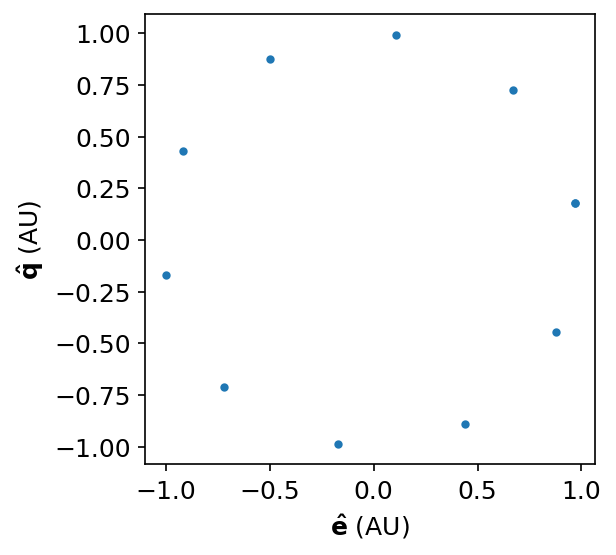

In [16]:
# plot to make sure the orbit looks good
%matplotlib inline
plt.rcParams["figure.dpi"] = 150
plt.rcParams["font.size"] = 12
fig = plt.figure(figsize=(3, 3))
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(r[:, 0], r[:, 1], ".")
ax.set_xlabel("$\mathbf{\hat{e}}$ (AU)")
ax.set_ylabel("$\mathbf{\hat{q}}$ (AU)");

In [17]:
# Let's see how well we perform as a function of series order and propagation step used

# calculate sigma, p and q
r0, v0 = r[0], v[0]
sval = mu / (np.linalg.norm(r0) ** 3)
pval = np.dot(r0, v0)
qval = np.dot(v0, v0) / np.dot(r0, r0) - sval

# we'll consider series order 1 through 50
# and time steps of 0.1 to 1 orbital periods
ords = np.arange(1, len(fs2))
ts = t[1:]

rerr = np.zeros((len(ts), len(ords)))
verr = np.zeros((len(ts), len(ords)))
fgcheck = np.zeros((len(ts), len(ords)))

for j, dt in enumerate(ts):
    # evaluate series elements for current time step
    fvals = fseries(sval, pval, qval, dt)
    gvals = gseries(sval, pval, qval, dt)
    fdvals = fdotseries(sval, pval, qval, dt)
    gdvals = gdotseries(sval, pval, qval, dt)

    # now check performance for all orders of the series expansion
    for k, n in enumerate(ords):
        f = np.sum(fvals[: n + 1])
        g = np.sum(gvals[: n + 1])
        fd = np.sum(fdvals[: n + 1])
        gd = np.sum(gdvals[: n + 1])

        fgcheck[j, k] = f * gd - g * fd
        rerr[j, k] = (
            np.linalg.norm(f * r0 + g * v0 - r[j + 1]) / np.linalg.norm(r[j + 1]) * 100
        )
        verr[j, k] = (
            np.linalg.norm(fd * r0 + gd * v0 - v[j + 1])
            / np.linalg.norm(v[j + 1])
            * 100
        )

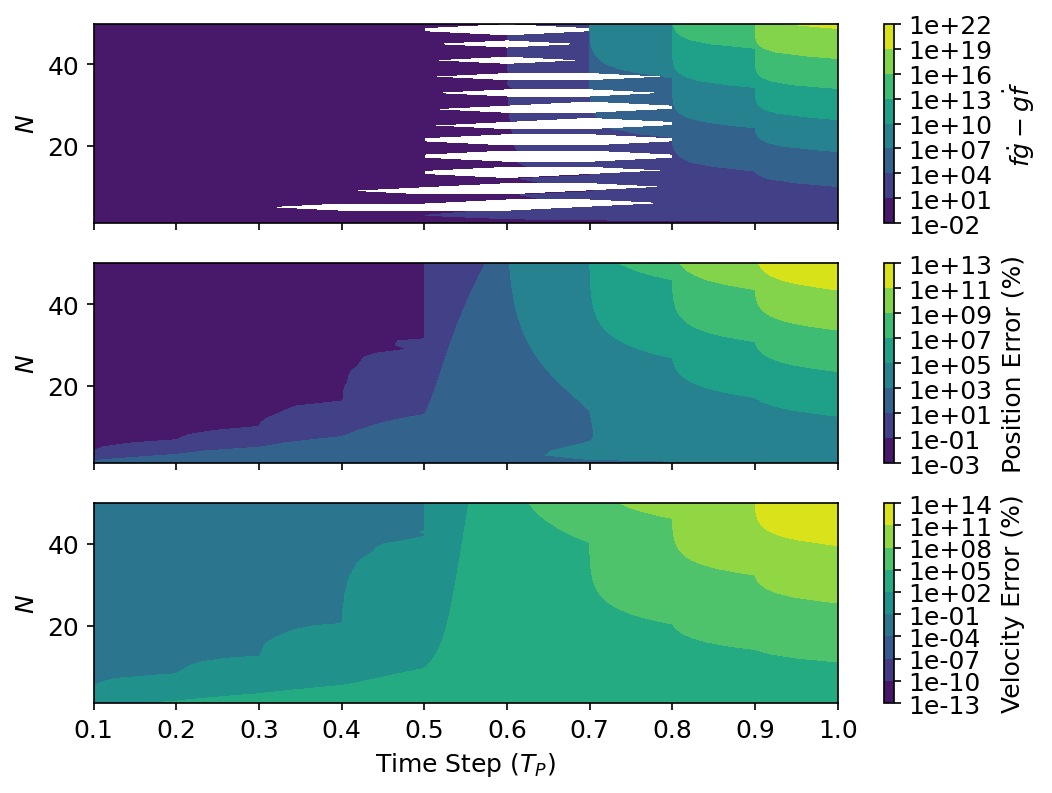

In [18]:
from matplotlib import ticker

fig, ax = plt.subplots(3, 1, figsize=(8, 6), sharex=True)
tmp = np.ma.masked_where(fgcheck.transpose() <= 0, fgcheck.transpose())
p1 = ax[0].contourf(ts, ords, tmp, locator=ticker.LogLocator())
cb1 = fig.colorbar(p1, ax=ax[0], label="$f\dot{g} - g\dot{f}$", format="%.0e")
p2 = ax[1].contourf(ts, ords, rerr.transpose(), locator=ticker.LogLocator())
cb2 = fig.colorbar(p2, ax=ax[1], label="Position Error (%)", format="%.0e")
p3 = ax[2].contourf(ts, ords, verr.transpose(), locator=ticker.LogLocator())
cb3 = fig.colorbar(p3, ax=ax[2], label="Velocity Error (%)", format="%.0e")
for a in ax:
    a.set_ylabel("$N$")
ax[2].set_xlabel("Time Step ($T_P$)");

Clearly, the series approach breaks down as step size increases. Interestingly enough, the position and velocity errors at high step sizes (approaching a full orbital period) are actually *worse* for higher-order series expansions than for lower-order ones.  This is due to the high powers of $\Delta{t}$ in the larger series expansions, which have a de-stabilizing effect. The white regions in the first plot are locations where $\dot f g - g \dot f$ evaluates to a negative value.

Let's re-draw the figure, focusing only on propagation up to 0.5 orbital periods:

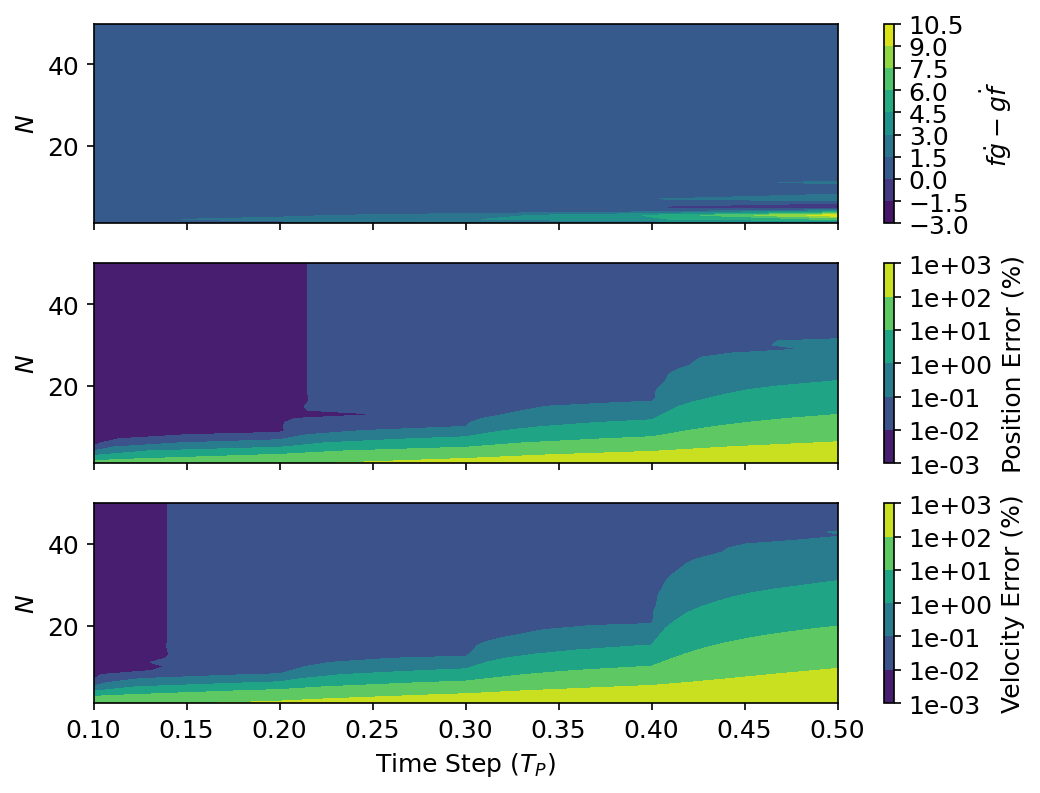

In [19]:
fig, ax = plt.subplots(3, 1, figsize=(8, 6), sharex=True)
p1 = ax[0].contourf(ts[:5], ords, fgcheck[:5].transpose())
cb1 = fig.colorbar(p1, ax=ax[0], label="$f\dot{g} - g\dot{f}$")
p2 = ax[1].contourf(ts[:5], ords, rerr[:5].transpose(), locator=ticker.LogLocator())
cb2 = fig.colorbar(p2, ax=ax[1], label="Position Error (%)", format="%.0e")
p3 = ax[2].contourf(ts[:5], ords, verr[:5].transpose(), locator=ticker.LogLocator())
cb3 = fig.colorbar(p3, ax=ax[2], label="Velocity Error (%)", format="%.0e")
for a in ax:
    a.set_ylabel("$N$")
ax[2].set_xlabel("Time Step ($T_P$)");

So, broadly, we can say that the series solution approach to the f and g functions can give reasonably good estimates of propagated position and velocity for small time steps and using series of order ~10 or higher.  For very small time steps, even just a few series terms can give a coarse (but not completely useless) estimate.

The $\dot f g - g\dot{f}$ expression serves as a diagnostic check on how well our series are converging, but is quite hard to visualize.  Let's take one final look at it, plotting absolute deviation from 1, and ignoring anything with magnitude of error greater than 1:

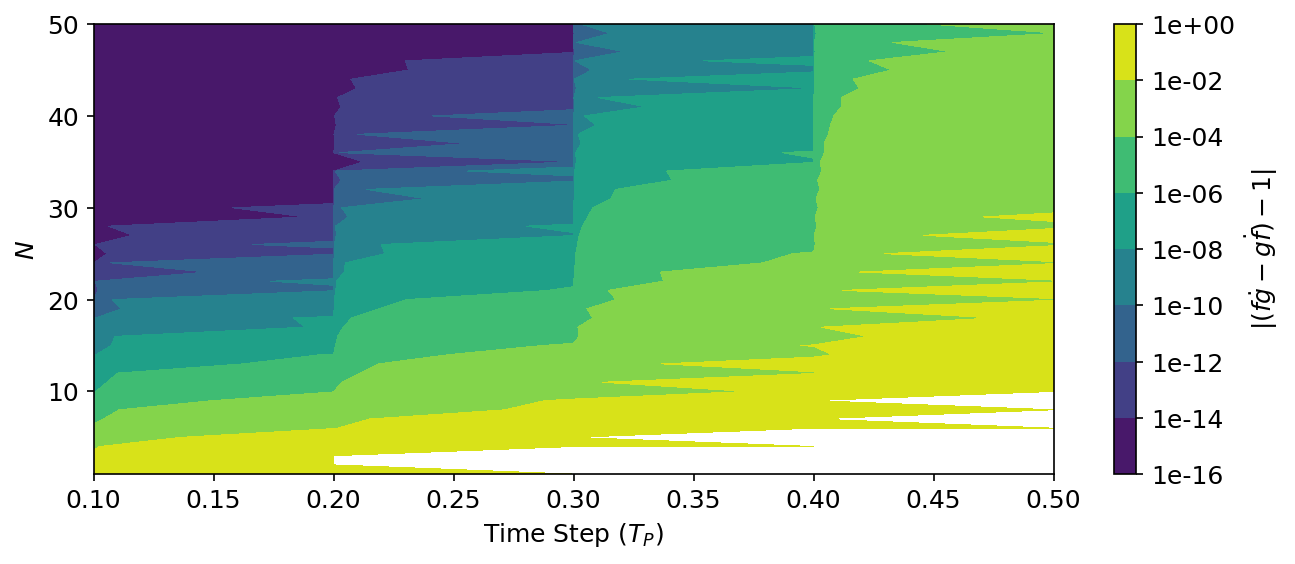

In [20]:
fig = plt.figure(figsize=(8, 3))
ax = fig.add_axes([0, 0, 1, 1])
tmp = np.abs(fgcheck[:5].transpose() - 1)
tmp[tmp == 0] = np.min(
    tmp[tmp > 0]
)  # replace true zeros with minimum value to allow for log-scaling
tmp = np.ma.masked_where(tmp > 1, tmp)
p1 = ax.contourf(ts[:5], ords, tmp, locator=ticker.LogLocator())
cb1 = fig.colorbar(
    p1, ax=ax, label="$\\vert(f\dot{g} - g\dot{f}) - 1\\vert$", format="%.0e"
)
ax.set_ylabel("$N$")
ax.set_xlabel("Time Step ($T_P$)");

In this case, the white regions at the bottom of the plot represent locations where $\dot f g - g\dot{f}$ is either negative or greater than 2. Our conclusions from before appear to still hold.  This method has significantly diminishing returns as you approach propagations of half of an orbital period, but can give excellent results (even down to machine precision) for propagations of up to 0.3  orbital periods, if series of order 50 are used.  For propagating up to 0.1 orbital periods, machine precision can be accomplished with 'only' a 30$\textrm{th}$ order expansion.  All of this should be taken with a grain of salt, as we are basing this on a single sample orbit, but these general statements tend to hold across a wide variety of orbits.  Why don't you try it and see?

<div class="alert alert-block alert-warning">
<b>Exercise</b><br> Explore the accuracy of the series solution to the $f$ and $g$ functions for a different orbit than the one considered above.
</div>

In [21]:
# This is just here to generate the link to the next notebook
genNextLink()

# [Next](<21-Universal Variables.ipynb>)